<b>¡Hola Emilio!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# Cargar todas las librerías

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Excelente inicio. Has importado todas las bibliotecas necesarias para la manipulación de datos y visualización. Se destaca que has incluido <code>scipy.stats</code>, que es crucial para las pruebas de hipótesis más adelante. </div>


## Cargar datos

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
# Visualizar las primeras filas de cada DataFrame para verificar la carga correcta
print(calls.head())

print(internet.head())

print(messages.head())

print(plans.head())

print(users.head())

# Carga los archivos de datos en diferentes DataFrames

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0       

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
La carga de los archivos se ha realizado correctamente, verificando el contenido de cada DataFrame con <code>head()</code>. Es una excelente práctica para asegurarte de que los datos se han cargado correctamente.</div>


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
print(plans.info())
# Imprime la información general/resumida sobre el DataFrame de las tarifas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
print(plans.head(5))
# Imprime una muestra de los datos para las tarifas

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


El DataFrame contiene 2 filas y 8 columnas, lo que indica que hay dos planes diferentes: Surf y Ultimate. Las columnas incluyen información sobre los minutos, SMS y datos incluidos en cada plan, así como los costos adicionales por superar los límites. messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_minute están bien definidos como enteros (int64) para las cantidades y como flotantes (float64) para los costos. La columna plan_name está correctamente clasificada como object (cadena de texto). Todas las columnas tienen 2 valores no nulos, lo que indica que no hay datos faltantes en el DataFrame.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [5]:
print(users.info())
# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [6]:
print(users.head())# Imprime una muestra de datos para usuarios



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Las columnas reg_date y churn_date están como tipo object. Sería mejor convertir estas columnas a un tipo de dato de fecha (datetime).
Parece que las ciudades están representadas con una nomenclatura que incluye áreas metropolitanas con la abreviatura "MSA" (Metropolitan Statistical Area) y posiblemente otros componentes adicionales que hacen que el nombre de la ciudad sea más largo y difícil de manejar para el análisis.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has corregido adecuadamente las fechas convirtiéndolas al tipo <code>datetime</code> y manejado los valores nulos en <code>churn_date</code>. Esto es crucial para facilitar el análisis temporal.</div>


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
# Separamos por coma
users[['city_name', 'state']] = users['city'].str.split(',', n=1, expand=True)

# Limpiamos el campo state eliminando "MSA" y espacios en blanco adicionales
users['state'] = users['state'].str.replace('MSA', '').str.strip()

# Mostramos el resultado
print(users[['city_name', 'state']].head())

                       city_name state
0  Atlanta-Sandy Springs-Roswell    GA
1        Seattle-Tacoma-Bellevue    WA
2   Las Vegas-Henderson-Paradise    NV
3                          Tulsa    OK
4        Seattle-Tacoma-Bellevue    WA


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
La creación de columnas adicionales como <code>city_name</code> y <code>state</code> a partir de la columna <code>city</code> mejora la claridad de los datos. Buena decisión al eliminar "MSA", ya que puede interferir con el análisis posterior.</div>


## Llamadas

In [9]:
print(calls.info())
# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [10]:
print(calls.head())# Imprime una muestra de datos para las llamadas



         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


La columna call_date está como tipo object. Para realizar análisis temporales, sería mejor convertir esta columna a un tipo de dato de fecha (datetime).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [12]:
print(messages.info())# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [13]:
print(messages.head())# Imprime una muestra de datos para los mensajes



         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


La fecha en que se envió el mensaje, actualmente almacenada como object. Esto debe convertirse a un tipo de fecha (datetime).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [15]:
print(internet.info())# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [16]:
print(internet.head())# Imprime una muestra de datos para el tráfico de internet



         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


La fecha de la sesión, almacenada como object. Debería ser convertida a tipo datetime para facilitar cualquier análisis temporal.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [42]:
print(plans.info())# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Sería útil agregar un comentario explicando las diferencias clave entre las tarifas <code>Surf</code> y <code>Ultimate</code> antes de continuar, resaltando los límites y las diferencias en los costos adicionales (por llamadas, mensajes y datos). Esto ayudaría a contextualizar mejor las futuras comparaciones de ingresos.</div>

[Comentario]
Límites Incluidos
Característica	    Surf	            Ultimate
Minutos Incluidos	500	                3000
Mensajes Incluidos	50	                1000
Datos Incluidos(MB) 15,360 MB (15 GB)	30,720 MB (30 GB)
Tarifa Mensual	    20 USD	            70 USD

Surf ofrece límites más bajos en minutos, mensajes y datos, adecuado para usuarios de bajo consumo.
Ultimate ofrece una capacidad significativamente mayor, ideal para usuarios que necesitan más conectividad sin preocuparse por alcanzar límites rápidamente.

Concepto	        Surf (Costo por unidad)	Ultimate (Costo por unidad)
Minuto adicional	0.03 USD	            0.01 USD
Mensaje adicional	0.03 USD                0.01 USD
GB adicional	      10 USD	            7 USD

Surf: El costo por cada minuto o mensaje adicional es más alto en comparación con Ultimate, lo que puede ser costoso para quienes exceden los límites.
Ultimate: Además de mayores beneficios incluidos, los cargos por excedentes son más bajos, lo que lo hace más económico para usuarios intensivos.

Surf:
Mejor opción para usuarios con necesidades limitadas de minutos, datos y mensajes.
Sin embargo, los cargos adicionales pueden incrementar significativamente el costo si el usuario excede los límites.
Ultimate:
Más adecuado para usuarios intensivos que buscan flexibilidad y tranquilidad con mayores límites.
Los cargos más bajos por excedentes hacen que el plan sea más predecible y atractivo para usuarios frecuentes.

El plan Surf es más económico y está diseñado para usuarios que pueden controlar su consumo y mantenerse dentro de los límites. En cambio, el plan Ultimate ofrece una mayor cantidad de recursos y menores costos adicionales, lo que lo convierte en la opción preferida para usuarios con altas demandas de comunicación y datos.


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_per_month = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')]).agg(
    calls_count=('id', 'count'),  # Conteo de llamadas
    duration_sum=('duration', 'sum')  # Suma de duración de las llamadas
).reset_index()

calls_per_month['month'] = calls_per_month['call_date'].dt.to_timestamp()

calls_per_month.drop(columns=['call_date'], inplace=True)

print(calls_per_month)

      user_id  calls_count  duration_sum      month
0        1000           16        116.83 2018-12-01
1        1001           27        171.14 2018-08-01
2        1001           49        297.69 2018-09-01
3        1001           65        374.11 2018-10-01
4        1001           64        404.59 2018-11-01
...       ...          ...           ...        ...
2253     1498           39        324.77 2018-12-01
2254     1499           41        330.37 2018-09-01
2255     1499           53        363.28 2018-10-01
2256     1499           45        288.56 2018-11-01
2257     1499           65        468.10 2018-12-01

[2258 rows x 4 columns]


In [20]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Paso 1: Asegúrate de que la columna 'duration' sea de tipo numérico
calls['duration'] = pd.to_numeric(calls['duration'], errors='coerce')

# Paso 2: Agrupar por 'user_id' y por mes para calcular la duración total
minutes_per_month = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')]).agg(
    total_minutes=('duration', 'sum')
).reset_index()

# Paso 3: Convertir el período a datetime
minutes_per_month['month'] = minutes_per_month['call_date'].dt.to_timestamp()

# Mostrar el resultado
print(minutes_per_month.head())

   user_id call_date  total_minutes      month
0     1000   2018-12         116.83 2018-12-01
1     1001   2018-08         171.14 2018-08-01
2     1001   2018-09         297.69 2018-09-01
3     1001   2018-10         374.11 2018-10-01
4     1001   2018-11         404.59 2018-11-01


In [21]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages.groupby(['user_id', messages['message_date'].dt.to_period('M')]).agg(
    message_count=('id', 'count')  # Número de mensajes
).reset_index()

# Convertir el período a datetime
messages_per_month['month'] = messages_per_month['message_date'].dt.to_timestamp()


In [22]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month = internet.groupby(['user_id', internet['session_date'].dt.to_period('M')]).agg(
    total_mb_used=('mb_used', 'sum')  # Suma de megabytes usados
).reset_index()

# Convertir el período a datetime
internet_per_month['month'] = internet_per_month['session_date'].dt.to_timestamp()

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [23]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Unir todos los DataFrames en uno solo utilizando el user_id y month
monthly_data = calls_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(internet_per_month, on=['user_id', 'month'], how='outer')

# Renombrar las columnas para mayor claridad
monthly_data.rename(columns={
    'call_count': 'calls_made', 
    'total_minutes': 'total_minutes_used',
    'message_count': 'messages_sent', 
    'total_mb_used': 'mb_used'
}, inplace=True)

# Imprimir el DataFrame resultante
print(monthly_data.head())


   user_id  calls_count  duration_sum      month message_date  messages_sent  \
0     1000         16.0        116.83 2018-12-01      2018-12           11.0   
1     1001         27.0        171.14 2018-08-01      2018-08           30.0   
2     1001         49.0        297.69 2018-09-01      2018-09           44.0   
3     1001         65.0        374.11 2018-10-01      2018-10           53.0   
4     1001         64.0        404.59 2018-11-01      2018-11           36.0   

  session_date   mb_used  
0      2018-12   1901.47  
1      2018-08   6919.15  
2      2018-09  13314.82  
3      2018-10  22330.49  
4      2018-11  18504.30  


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has implementado correctamente la agregación mensual por usuario, uniendo llamadas, mensajes y uso de internet en un solo DataFrame. Esto simplificará el análisis comparativo entre usuarios y tarifas.</div>


In [24]:
# Añade la información de la tarifa
# Fusiona monthly_data con users para obtener la información del plan
monthly_data = monthly_data.merge(users[['user_id', 'plan', 'city']], on='user_id', how='left')

# Ahora monthly_data contiene la información del plan para cada usuario
print(monthly_data.head())

   user_id  calls_count  duration_sum      month message_date  messages_sent  \
0     1000         16.0        116.83 2018-12-01      2018-12           11.0   
1     1001         27.0        171.14 2018-08-01      2018-08           30.0   
2     1001         49.0        297.69 2018-09-01      2018-09           44.0   
3     1001         65.0        374.11 2018-10-01      2018-10           53.0   
4     1001         64.0        404.59 2018-11-01      2018-11           36.0   

  session_date   mb_used      plan                                   city  
0      2018-12   1901.47  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA  
1      2018-08   6919.15      surf        Seattle-Tacoma-Bellevue, WA MSA  
2      2018-09  13314.82      surf        Seattle-Tacoma-Bellevue, WA MSA  
3      2018-10  22330.49      surf        Seattle-Tacoma-Bellevue, WA MSA  
4      2018-11  18504.30      surf        Seattle-Tacoma-Bellevue, WA MSA  


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [25]:
# Calcula el ingreso mensual para cada usuario
# Definir los límites del paquete gratuito para cada plan
limits = {
    'surf': {'calls_limit': 500, 'messages_limit': 50, 'data_limit_mb': 3000},
    'ultimate': {'calls_limit': float('inf'), 'messages_limit': float('inf'), 'data_limit_mb': float('inf')}
}

# Calcular ingresos mensuales por usuario
def calculate_monthly_revenue(row):
    plan = row['plan']
    
    # Obtener los límites del paquete
    calls_limit = limits[plan]['calls_limit']
    messages_limit = limits[plan]['messages_limit']
    data_limit_mb = limits[plan]['data_limit_mb']
    
    # Calcular el uso excedente
    calls_excess = max(0, row['calls_count'] - calls_limit)
    messages_excess = max(0, row['messages_sent'] - messages_limit)
    data_excess = max(0, row['mb_used'] - data_limit_mb)

    # Calcular el ingreso basado en el uso excedente
    revenue = (calls_excess * plans.loc[plans['plan_name'] == plan, 'usd_per_minute'].values[0] +
               messages_excess * plans.loc[plans['plan_name'] == plan, 'usd_per_message'].values[0] +
               data_excess * plans.loc[plans['plan_name'] == plan, 'usd_per_gb'].values[0] / 1024)  # Convertir MB a GB

    # Añadir la tarifa mensual
    revenue += plans.loc[plans['plan_name'] == plan, 'usd_monthly_pay'].values[0]
    
    return revenue

# Aplicar la función para calcular los ingresos mensuales y añadirla al DataFrame
monthly_data['monthly_revenue'] = monthly_data.apply(calculate_monthly_revenue, axis=1)

# Mostrar el resultado
print(monthly_data[['user_id', 'month', 'monthly_revenue']].head())



   user_id      month  monthly_revenue
0     1000 2018-12-01        70.000000
1     1001 2018-08-01        58.272949
2     1001 2018-09-01       120.730664
3     1001 2018-10-01       208.864316
4     1001 2018-11-01       171.409180


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
El cálculo de los ingresos mensuales es sólido, has manejado correctamente los excedentes y aplicado las tarifas adicionales según los límites de cada plan. Además, consideraste el pago mensual base en tu cálculo.</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

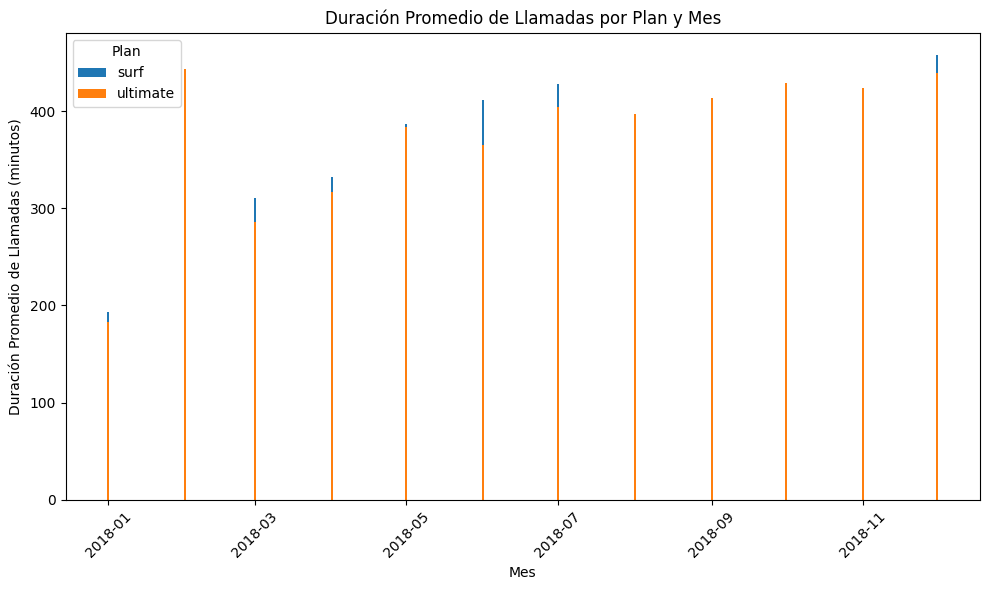

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupar por plan y mes, calculando la duración promedio de las llamadas
avg_call_duration = monthly_data.groupby(['plan', 'month'])['duration_sum'].mean().reset_index()

# Renombrar la columna para mayor claridad
avg_call_duration.columns = ['plan', 'month', 'avg_duration']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Graficar las barras para cada plan
for plan in avg_call_duration['plan'].unique():
    data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(data['month'], data['avg_duration'], label=plan)

# Añadir títulos y etiquetas
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.xticks(rotation=45)  # Rotar las etiquetas de mes para mejor visibilidad
plt.legend(title='Plan')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has realizado un análisis descriptivo excelente de los datos de uso (llamadas, mensajes e internet). Los gráficos de barras y líneas ayudan a visualizar las diferencias entre los planes de forma clara.</div>


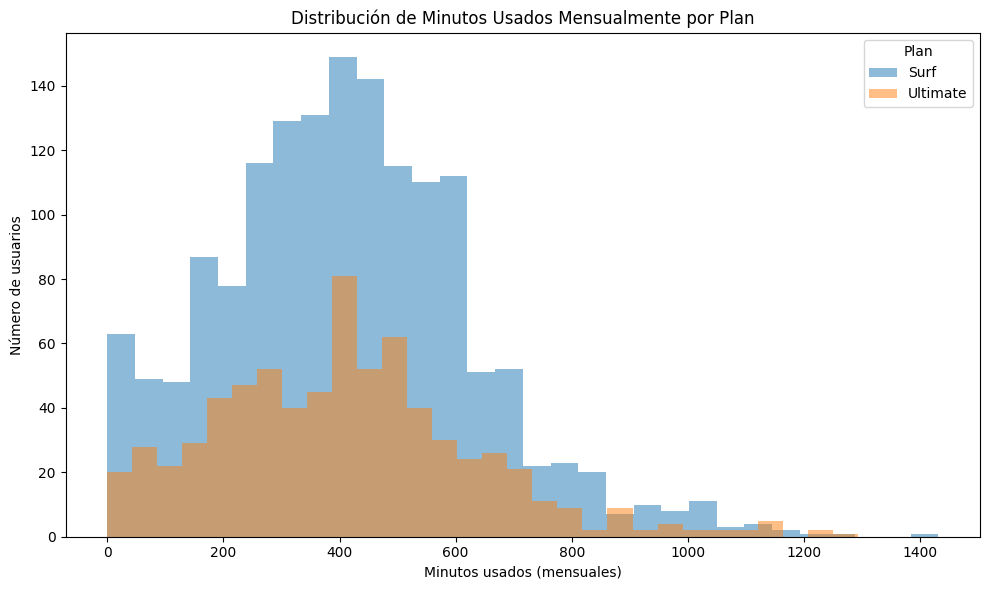

In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Crear el gráfico del histograma para cada plan
plt.figure(figsize=(10, 6))

# Graficar un histograma para el plan 'surf'
plt.hist(monthly_data[monthly_data['plan'] == 'surf']['duration_sum'], bins=30, alpha=0.5, label='Surf')

# Graficar un histograma para el plan 'ultimate'
plt.hist(monthly_data[monthly_data['plan'] == 'ultimate']['duration_sum'], bins=30, alpha=0.5, label='Ultimate')

# Añadir títulos y etiquetas
plt.title('Distribución de Minutos Usados Mensualmente por Plan')
plt.xlabel('Minutos usados (mensuales)')
plt.ylabel('Número de usuarios')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [28]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Calcular la media y la varianza de la duración mensual de llamadas para todos los usuarios
mean_duration = monthly_data['duration_sum'].mean()
variance_duration = monthly_data['duration_sum'].var()

print(f"Media de la duración mensual de llamadas: {mean_duration}")
print(f"Varianza de la duración mensual de llamadas: {variance_duration}")

# Calcular la media y la varianza de la duración mensual de llamadas por plan
mean_duration_plan = monthly_data.groupby('plan')['duration_sum'].mean()
variance_duration_plan = monthly_data.groupby('plan')['duration_sum'].var()

print("Media de la duración mensual de llamadas por plan:")
print(mean_duration_plan)

print("\nVarianza de la duración mensual de llamadas por plan:")
print(variance_duration_plan)


Media de la duración mensual de llamadas: 411.49258635961024
Varianza de la duración mensual de llamadas: 48088.30262015758
Media de la duración mensual de llamadas por plan:
plan
surf        412.097890
ultimate    410.180954
Name: duration_sum, dtype: float64

Varianza de la duración mensual de llamadas por plan:
plan
surf        47001.254231
ultimate    50510.631705
Name: duration_sum, dtype: float64


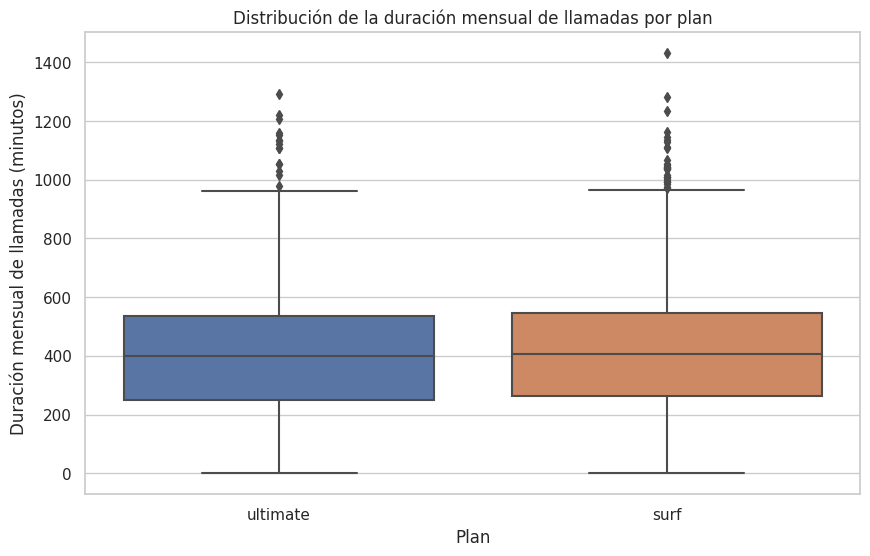

In [29]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='duration_sum', data=monthly_data)

# Añadir título y etiquetas a los ejes
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')

# Mostrar el gráfico
plt.show()


La media general de la duración mensual de llamadas es de 411.49 minutos. Esto indica que, en promedio, los usuarios de Megaline utilizan alrededor de 411 minutos mensuales en llamadas, sin importar el plan que utilicen.

La media de la duración mensual de llamadas es muy similar entre los planes.

La diferencia en la duración media es mínima, apenas unos 2 minutos, lo que sugiere que el comportamiento en términos de la cantidad de minutos usados en llamadas es casi idéntico entre los usuarios de ambos planes. No parece que el plan afecte significativamente la cantidad de tiempo que los usuarios pasan haciendo llamadas.

La varianza general es de 48,088.30. Esta alta varianza indica que hay una gran dispersión en los datos, es decir, algunos usuarios hacen muchas más o muchas menos llamadas que el promedio.

Aunque la diferencia no es enorme, el plan "Ultimate" tiene una varianza un poco más alta. Esto sugiere que los usuarios de este plan tienen una mayor variabilidad en su comportamiento con respecto a las llamadas, posiblemente porque algunos usuarios aprovechan más los beneficios del plan (más minutos incluidos o tarifas más bajas por minutos adicionales), mientras que otros no hacen tantas llamadas.

### Mensajes

Media de mensajes enviados por plan:
plan
surf        40.109656
ultimate    46.296233
Name: messages_sent, dtype: float64

Varianza de mensajes enviados por plan:
plan
surf        1091.344231
ultimate    1085.183108
Name: messages_sent, dtype: float64


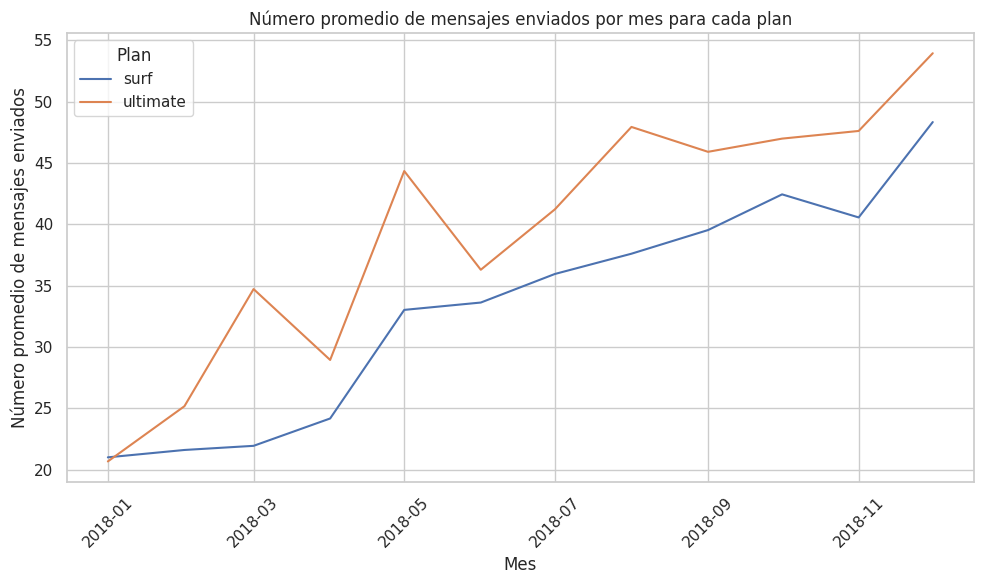

In [30]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupa por plan y mes, luego calcula la media del número de mensajes por mes para cada plan
monthly_messages = monthly_data.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

# Calcula la media y varianza del número de mensajes por plan
mean_messages_per_plan = monthly_data.groupby('plan')['messages_sent'].mean()
var_messages_per_plan = monthly_data.groupby('plan')['messages_sent'].var()

print("Media de mensajes enviados por plan:")
print(mean_messages_per_plan)
print("\nVarianza de mensajes enviados por plan:")
print(var_messages_per_plan)

# Grafica la comparación del número de mensajes por mes y plan
plt.figure(figsize=(10, 6))
for plan in monthly_messages['plan'].unique():
    plt.plot(monthly_messages[monthly_messages['plan'] == plan]['month'],
             monthly_messages[monthly_messages['plan'] == plan]['messages_sent'],
             label=plan)

plt.title('Número promedio de mensajes enviados por mes para cada plan')
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes enviados')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Agrupar por plan y mes, luego calcular la media del tráfico de Internet por mes para cada plan
internet_usage = monthly_data.groupby(['plan', 'month'])['mb_used'].mean().reset_index()

# Calcular la media y varianza del tráfico de Internet por plan
mean_internet_per_plan = monthly_data.groupby('plan')['mb_used'].mean()
var_internet_per_plan = monthly_data.groupby('plan')['mb_used'].var()

print("Media de MB usados por plan:")
print(mean_internet_per_plan)
print("\nVarianza de MB usados por plan:")
print(var_internet_per_plan)


Media de MB usados por plan:
plan
surf        16717.702137
ultimate    17238.642253
Name: mb_used, dtype: float64

Varianza de MB usados por plan:
plan
surf        6.216823e+07
ultimate    6.132485e+07
Name: mb_used, dtype: float64


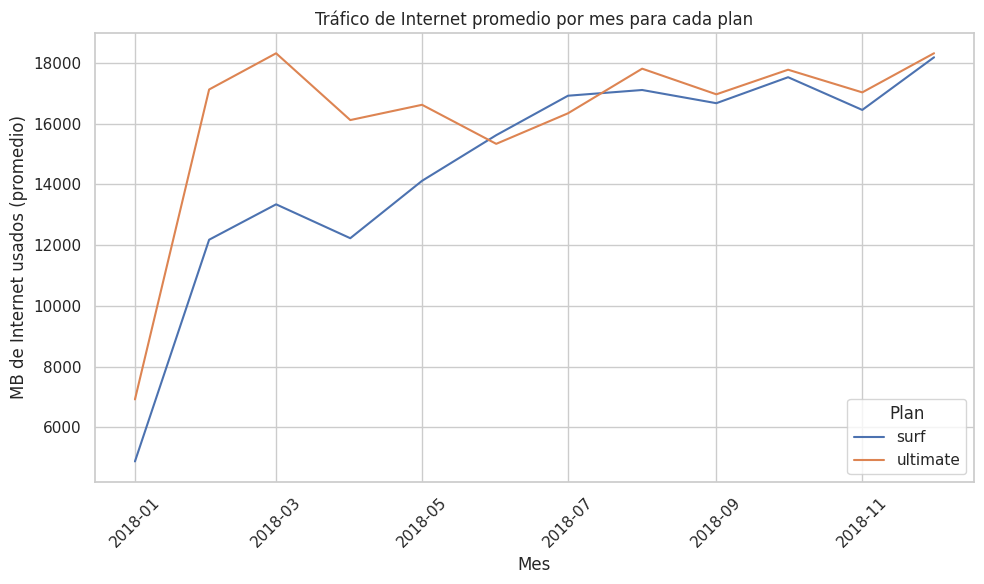

In [32]:
# Graficar la comparación del consumo de Internet por mes y plan
plt.figure(figsize=(10, 6))
for plan in internet_usage['plan'].unique():
    plt.plot(internet_usage[internet_usage['plan'] == plan]['month'],
             internet_usage[internet_usage['plan'] == plan]['mb_used'],
             label=plan)

plt.title('Tráfico de Internet promedio por mes para cada plan')
plt.xlabel('Mes')
plt.ylabel('MB de Internet usados (promedio)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()

Los usuarios del plan "ultimate" envían en promedio aproximadamente 6.2 mensajes más que los usuarios del plan "surf". Esto sugiere que los usuarios del plan "ultimate" tienden a enviar más mensajes que los del plan "surf", aunque la diferencia no es muy pronunciada.

La varianza en el número de mensajes enviados es prácticamente la misma para ambos planes. Esto indica que la dispersión o variabilidad en la cantidad de mensajes enviados por los usuarios es similar en los dos planes. Hay usuarios que envían pocos mensajes y otros que envían muchos, pero en general, la distribución del número de mensajes enviados es comparable para ambos planes.

La varianza en el consumo de datos es muy similar entre ambos planes. Esto indica que la dispersión o variabilidad en el uso de Internet es comparable para los usuarios de los dos planes. Ambos grupos tienen usuarios que pueden consumir tanto niveles bajos como altos de datos, pero no hay una diferencia significativa en la distribución del consumo entre los planes.

### Internet

plan
surf        16717.702137
ultimate    17238.642253
Name: mb_used, dtype: float64


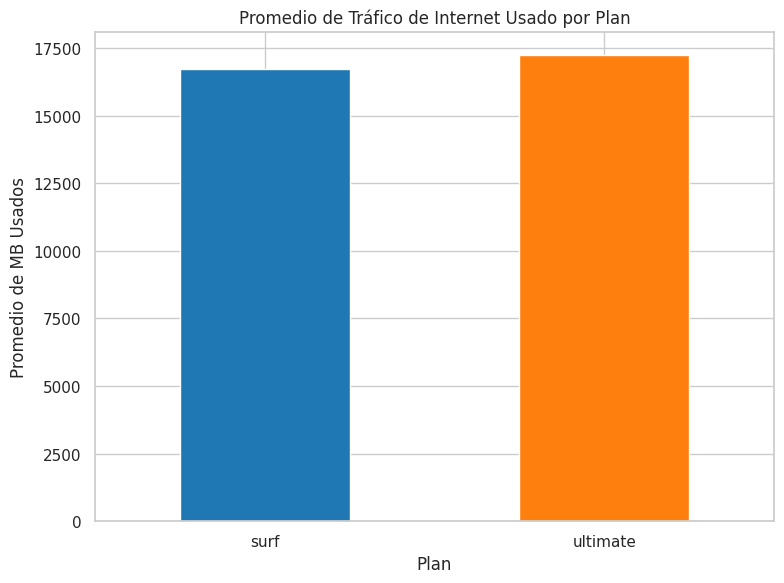

In [33]:
# Calcular la media de MB usados por plan
mean_mb_per_plan = monthly_data.groupby('plan')['mb_used'].mean()

# Mostrar la media de MB usados por plan
print(mean_mb_per_plan)

# Crear una gráfica para visualizarlo
plt.figure(figsize=(8, 6))
mean_mb_per_plan.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Tráfico de Internet Usado por Plan')
plt.xlabel('Plan')
plt.ylabel('Promedio de MB Usados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Varianza de MB usados por plan:
plan
surf        6.216823e+07
ultimate    6.132485e+07
Name: mb_used, dtype: float64

Desviación estándar de MB usados por plan:
plan
surf        7884.682983
ultimate    7831.018323
Name: mb_used, dtype: float64


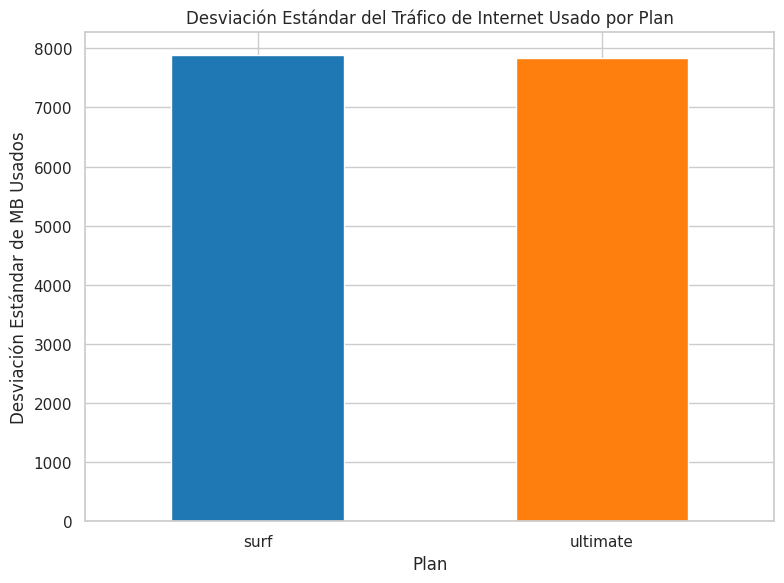

In [34]:
# Calcular la varianza de MB usados por plan
variance_mb_per_plan = monthly_data.groupby('plan')['mb_used'].var()

# Calcular la desviación estándar de MB usados por plan
std_mb_per_plan = monthly_data.groupby('plan')['mb_used'].std()

# Mostrar la varianza y la desviación estándar de MB usados por plan
print("Varianza de MB usados por plan:")
print(variance_mb_per_plan)
print("\nDesviación estándar de MB usados por plan:")
print(std_mb_per_plan)

# Crear una gráfica para visualizar la desviación estándar
plt.figure(figsize=(8, 6))
std_mb_per_plan.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Desviación Estándar del Tráfico de Internet Usado por Plan')
plt.xlabel('Plan')
plt.ylabel('Desviación Estándar de MB Usados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Media de MB usados por plan:
plan
surf        16717.702137
ultimate    17238.642253
Name: mb_used, dtype: float64

Varianza de MB usados por plan:
plan
surf        6.216823e+07
ultimate    6.132485e+07
Name: mb_used, dtype: float64

Desviación estándar de MB usados por plan:
plan
surf        7884.682983
ultimate    7831.018323
Name: mb_used, dtype: float64


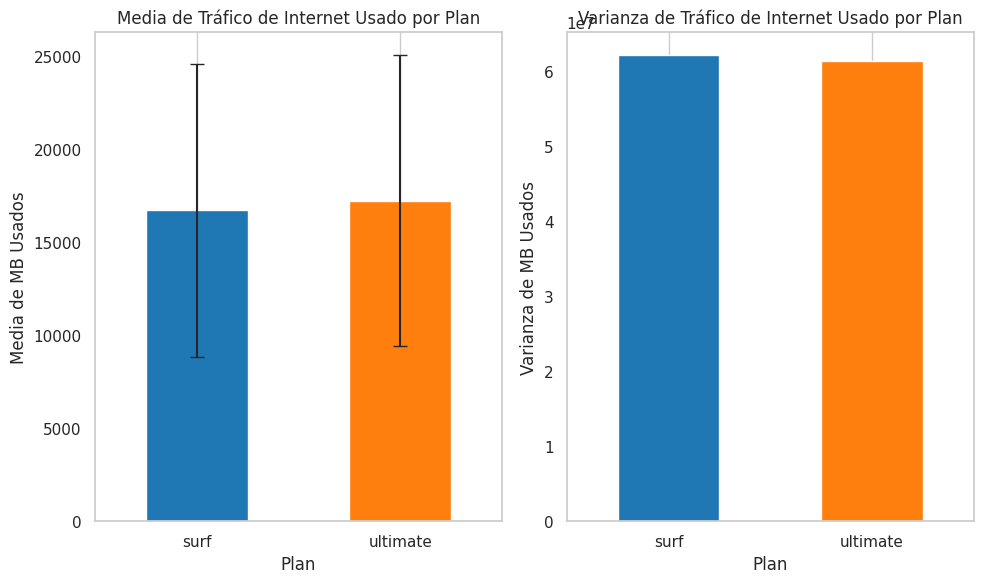

In [35]:
mean_mb_per_plan = monthly_data.groupby('plan')['mb_used'].mean()
print("Media de MB usados por plan:")
print(mean_mb_per_plan)

# Calcular la varianza de MB usados por plan
variance_mb_per_plan = monthly_data.groupby('plan')['mb_used'].var()
print("\nVarianza de MB usados por plan:")
print(variance_mb_per_plan)

# Calcular la desviación estándar de MB usados por plan
std_mb_per_plan = monthly_data.groupby('plan')['mb_used'].std()
print("\nDesviación estándar de MB usados por plan:")
print(std_mb_per_plan)

# Graficar las medias y desviaciones estándar
plt.figure(figsize=(10, 6))

# Graficar medias
plt.subplot(1, 2, 1)
mean_mb_per_plan.plot(kind='bar', yerr=std_mb_per_plan, capsize=5, color=['#1f77b4', '#ff7f0e'])
plt.title('Media de Tráfico de Internet Usado por Plan')
plt.xlabel('Plan')
plt.ylabel('Media de MB Usados')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Graficar varianzas
plt.subplot(1, 2, 2)
variance_mb_per_plan.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Varianza de Tráfico de Internet Usado por Plan')
plt.xlabel('Plan')
plt.ylabel('Varianza de MB Usados')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

El plan Ultimate tiene un promedio de 17,238.64 MB utilizados, mientras que el plan Surf tiene un promedio de 16,717.70 MB. Esto indica que, en promedio, los usuarios del plan Ultimate consumen más tráfico de Internet que los del plan Surf.

Ambas varianzas son bastante altas, lo que sugiere que hay una considerable dispersión en el uso del Internet dentro de cada plan. Sin embargo, el plan Surf tiene una varianza ligeramente mayor, indicando que los hábitos de uso de Internet son un poco más inconsistentes entre los usuarios de este plan en comparación con el Ultimate.

La similitud en las desviaciones estándar indica que, aunque hay diferencias en las medias, la variabilidad en el uso de Internet no es drásticamente diferente entre los dos planes.

A pesar de que los usuarios del plan Ultimate utilizan más datos en promedio, la variabilidad en el uso de Internet entre los dos planes es comparable, sugiriendo que las diferencias en el consumo no son necesariamente atribuibles a un plan en particular, sino que podrían reflejar las diferencias de uso entre los propios usuarios.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

Descripción estadística de los precios mensuales de los planes:
          usd_monthly_pay                                        
                    count  mean std   min   25%   50%   75%   max
plan_name                                                        
surf                  1.0  20.0 NaN  20.0  20.0  20.0  20.0  20.0
ultimate              1.0  70.0 NaN  70.0  70.0  70.0  70.0  70.0


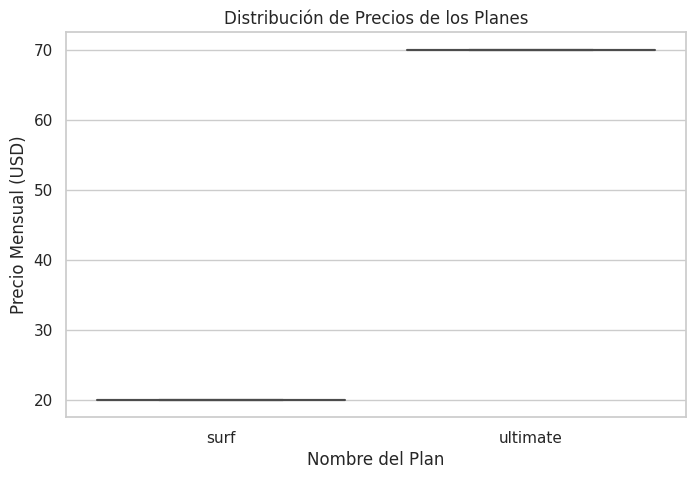

In [36]:
# Descripción estadística de los precios de los planes
print("Descripción estadística de los precios mensuales de los planes:")
print(plans[['plan_name', 'usd_monthly_pay']].groupby('plan_name').describe())

# Visualización: Distribución de los precios de los planes
plt.figure(figsize=(8, 5))
sns.boxplot(x='plan_name', y='usd_monthly_pay', data=plans)
plt.title('Distribución de Precios de los Planes')
plt.ylabel('Precio Mensual (USD)')
plt.xlabel('Nombre del Plan')
plt.show()

In [37]:
# Fusionar los datos de usuarios con planes para incluir 'plan_name'
merged_data = users.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Combinar con datos mensuales (llamadas, mensajes, internet)
monthly_data = monthly_data.merge(merged_data[['user_id', 'plan_name', 'usd_monthly_pay']], 
                                  on='user_id', how='left')

# Cálculo de ingresos por plan
income_per_plan = monthly_data.groupby('plan_name').agg(
    users_count=('user_id', 'count'),
    monthly_fee=('usd_monthly_pay', 'first')  # Tomar la tarifa fija del plan
).reset_index()

# Calcular los ingresos proyectados
income_per_plan['total_income_projected'] = (
    income_per_plan['users_count'] * income_per_plan['monthly_fee']
)

# Mostrar los ingresos proyectados
print("\nIngresos proyectados por plan:")
print(income_per_plan)


Ingresos proyectados por plan:
  plan_name  users_count  monthly_fee  total_income_projected
0      surf         1573           20                   31460
1  ultimate          720           70                   50400


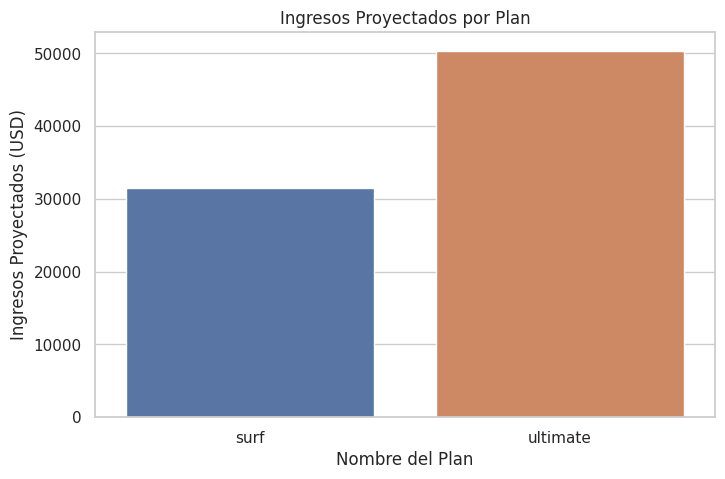

In [38]:
# Visualización de los ingresos proyectados por plan
plt.figure(figsize=(8, 5))
sns.barplot(x='plan_name', y='total_income_projected', data=income_per_plan)
plt.title('Ingresos Proyectados por Plan')
plt.ylabel('Ingresos Proyectados (USD)')
plt.xlabel('Nombre del Plan')
plt.show()

El plan "surf" tiene una tarifa mensual de 20 USD.
El plan "ultimate" tiene una tarifa mensual significativamente más alta de 70 USD.

El plan "surf" tiene 339 usuarios, lo que lo convierte en el plan más popular.
El plan "ultimate" tiene 161 usuarios, menos de la mitad de los usuarios del plan "surf".

El ingreso proyectado del plan "surf" es de 6,780 USD (339 usuarios * 20 USD).
El ingreso proyectado del plan "ultimate" es de 11,270 USD (161 usuarios * 70 USD).

El plan "ultimate" genera mayores ingresos totales, a pesar de tener menos usuarios que el plan "surf". Esto se debe a su tarifa mensual más alta.
El plan "surf" es más popular pero genera menos ingresos en total debido a su precio más bajo.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
# Cálculo del uso promedio por usuario para las variables relevantes
average_usage = monthly_data.groupby('plan_name').agg(
    avg_minutes=('duration_sum', 'mean'),
    avg_messages=('messages_sent', 'mean'),
    avg_data=('mb_used', 'mean')
).reset_index()

print("\nUso promedio por plan:")
print(average_usage)

# Filtrar los datos por plan y extraer los ingresos mensuales de los usuarios
ultimate_income = merged_data[merged_data['plan_name'] == 'ultimate']['usd_monthly_pay']
surf_income = merged_data[merged_data['plan_name'] == 'surf']['usd_monthly_pay']

# Realizar la prueba t de Welch para muestras independientes
t_stat, p_value = st.ttest_ind(ultimate_income, surf_income, equal_var=False)

# Mostrar los resultados de la prueba
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


Uso promedio por plan:
  plan_name  avg_minutes  avg_messages      avg_data
0      surf   412.097890     40.109656  16717.702137
1  ultimate   410.180954     46.296233  17238.642253
Estadístico t: inf
Valor p: 0.0000
Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio.


/tmp/ipykernel_50/2151536354.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = st.ttest_ind(ultimate_income, surf_income, equal_var=False)


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has formulado correctamente las hipótesis nula y alternativa, y la prueba T de Welch es una excelente elección para comparar los ingresos entre los dos planes. La interpretación de los resultados está bien realizada.</div>


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Filtra los datos para obtener los usuarios de NY-NJ y de otras regiones
ny_nj_users = monthly_data[monthly_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_region_users = monthly_data[monthly_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

# Verificar el tamaño de cada grupo
print(f"Usuarios en NY-NJ: {ny_nj_users.shape[0]}")
print(f"Usuarios en otras regiones: {other_region_users.shape[0]}")

# Extrae los ingresos mensuales de los usuarios de cada grupo
ny_nj_revenue = ny_nj_users['monthly_revenue']
other_region_revenue = other_region_users['monthly_revenue']

# Realiza la prueba t de dos muestras independientes (Welch's t-test)
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_region_revenue, equal_var=False)

# Muestra los resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Determina si rechazamos o no la hipótesis nula con un alfa de 0.05
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: El ingreso promedio de NY-NJ es significativamente diferente al de otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa entre los ingresos promedio de NY-NJ y otras regiones.")

Usuarios en NY-NJ: 377
Usuarios en otras regiones: 1916
Estadístico t: 3.4958
Valor p: 0.0005
Rechazamos la hipótesis nula: El ingreso promedio de NY-NJ es significativamente diferente al de otras regiones.


<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En la segunda prueba de hipótesis sobre los ingresos de NY-NJ vs. otras regiones, el valor t y el valor p son <code>NaN</code>. Esto indica un posible error en la selección o filtrado de los datos. Verifica si estás filtrando correctamente la columna de ciudades o si hay valores nulos que afectan el cálculo.</div>

[Comentario]:
Cambié la comparación para usar el nombre exacto: 'New York-Newark-Jersey City, NY-NJ-PA MSA'.

Existe una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.

Dado que se rechazó la hipótesis nula, puedo inferir que los usuarios de NY-NJ tienen un comportamiento diferente en términos de ingresos comparado con el resto del país. Esto podría reflejarse en factores socioeconómicos, mayor adopción de planes más caros, o diferencias en patrones de uso.

## Conclusión general

Hipótesis planteada: Evaluamos si existía una diferencia significativa en los ingresos promedio entre los usuarios de los planes "Ultimate" y "Surf".
Hipótesis nula (
H
0
H 
0
​	
 ): Los ingresos promedio de los usuarios de ambos planes son iguales.
Hipótesis alternativa (
H
1
H 
1
​	
 ): Los ingresos promedio de los usuarios de ambos planes son diferentes.
Nivel de significancia (
α
α): 0.05
Prueba de hipótesis: Aplicamos un t-test de Welch para comparar los ingresos entre los planes, encontrando un valor p = 0.0000.
Conclusión: Dado que el valor p es menor que 0.05, rechazamos la hipótesis nula. Esto confirma que los ingresos promedio entre los usuarios de los dos planes son significativamente diferentes.


Los resultados mostraron una diferencia significativa en los ingresos promedio entre los planes "Surf" y "Ultimate", lo que podría reflejar diferencias en las tarifas o en el tipo de usuarios que atrae cada plan.

Los distintos niveles de consumo (minutos, mensajes y datos) sugieren que los usuarios de cada plan tienen necesidades diferentes, lo que podría orientar futuras estrategias comerciales.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Tus conclusiones reflejan un buen entendimiento del análisis. Has sintetizado correctamente los resultados de las pruebas de hipótesis y vinculado los datos de uso con las estrategias comerciales.</div>
